In [3]:
import pymc3 as pm
import numpy as np
import matplotlib.pyplot as plt


%load_ext autoreload
%autoreload 2
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [49]:
# Data
k_known = 30
theta_known = 5
alpha_known = k_known
beta_known = 1 / theta_known
data_sample_size = 5
data = np.random.gamma(shape=k_known, scale=theta_known, size=data_sample_size)
data

array([ 158.38961824,  154.87160594,  131.07054645,  167.8474522 ,
        173.96473344])

(array([   48.,   420.,  1606.,  2775.,  2687.,  1570.,   605.,   228.,
           50.,    11.]),
 array([  67.97475264,   87.83742105,  107.70008947,  127.56275788,
         147.4254263 ,  167.28809472,  187.15076313,  207.01343155,
         226.87609996,  246.73876838,  266.60143679]),
 <a list of 10 Patch objects>)

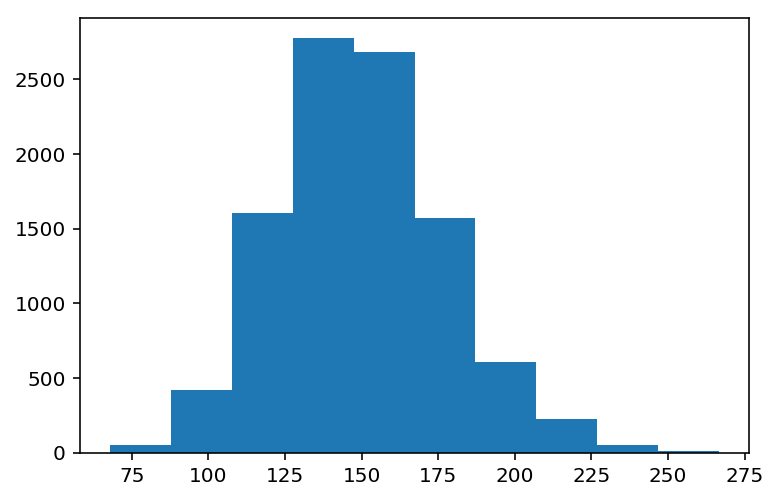

In [50]:
full_distribution = np.random.gamma(k_known, theta_known, size=10000)
plt.hist(full_distribution)

In [51]:
with pm.Model() as buck_problem:
    k = pm.HalfCauchy('k', 100**2)
    # theta = pm.HalfCauchy('theta', 100**2)
    
    beta = pm.HalfCauchy('beta', 100**2)
    likelihood = pm.Gamma('like', alpha=k, beta=beta, observed=data)
    theta = pm.Deterministic('theta', 1/beta)

In [52]:
with buck_problem:
    trace = pm.sample(10000)

Auto-assigning NUTS sampler...
Initializing NUTS using advi...
Average ELBO = -41.048: 100%|██████████| 200000/200000 [00:10<00:00, 19924.84it/s]   
Finished [100%]: Average ELBO = -40.588
100%|██████████| 10000/10000 [00:23<00:00, 431.05it/s]


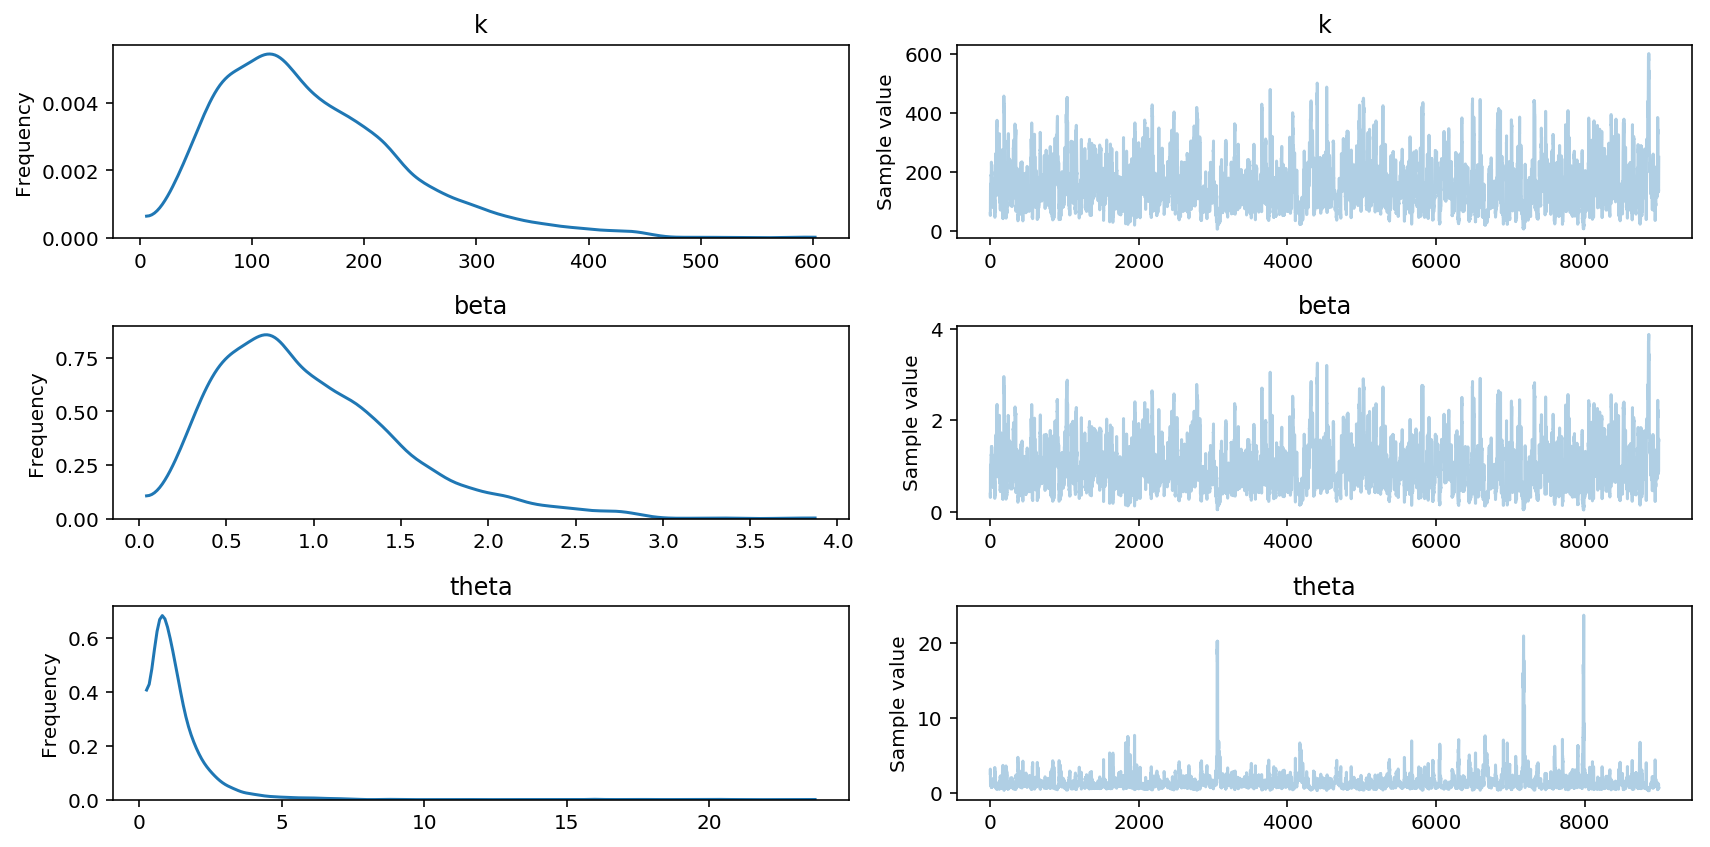

In [53]:
with buck_problem:
    pm.traceplot(trace[1000:])

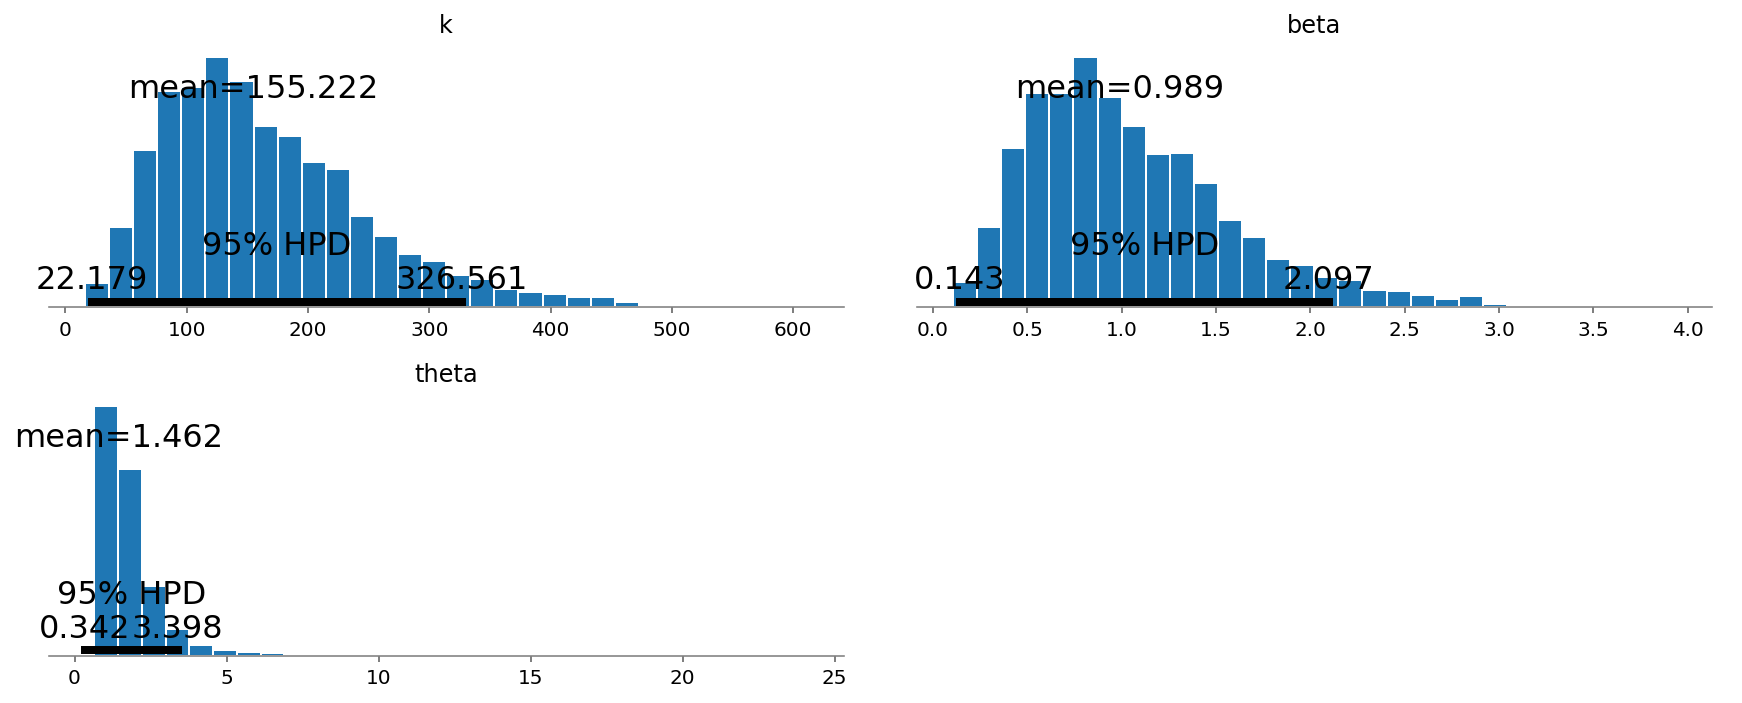

In [54]:
with buck_problem:
    pm.plot_posterior(trace[1000:])

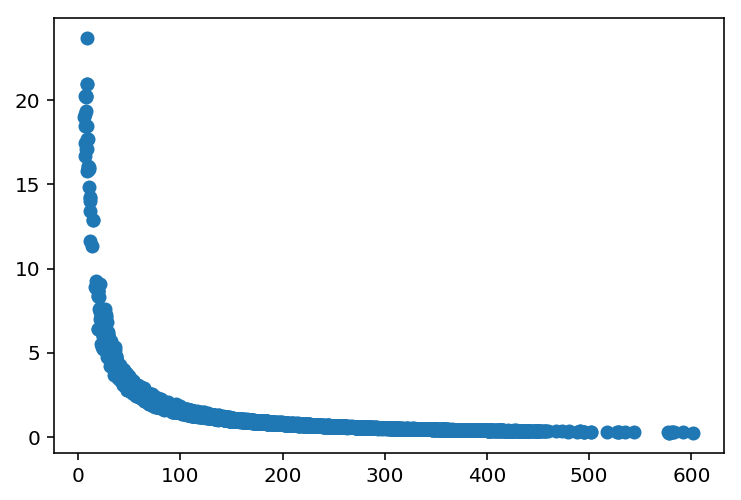

In [57]:
plt.scatter(trace['k'], trace['theta'])

In [58]:
import seaborn as sns


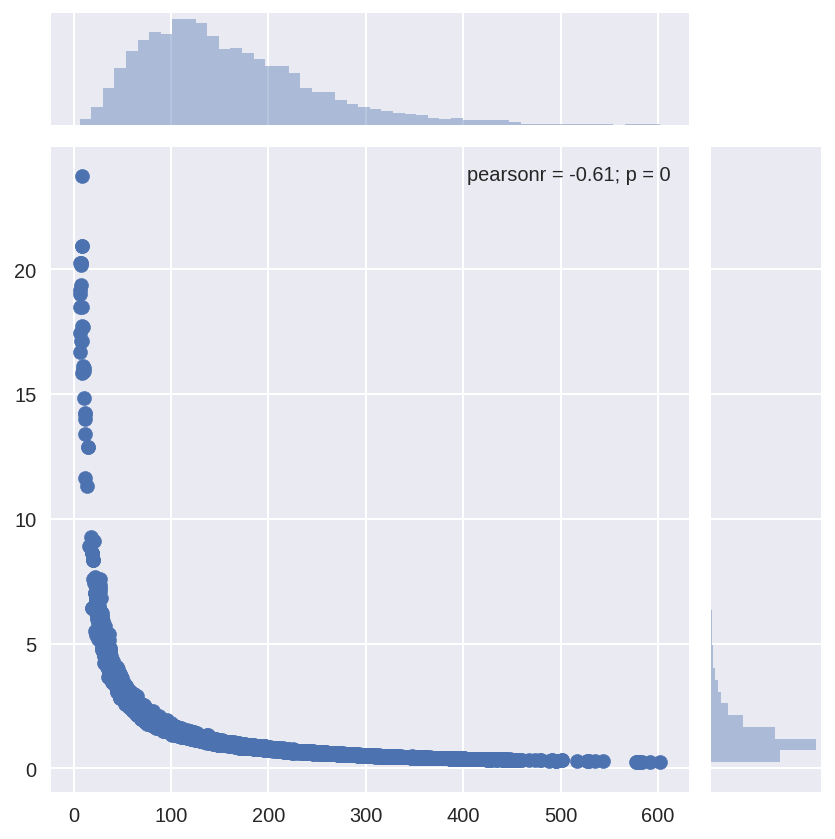

In [59]:
sns.jointplot(trace['k'], trace['theta'])